# Configuration

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scikitlearn importing
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)

# Importing Dataset

In [2]:
std_df = pd.read_csv('processed_dataset/std_dataset', index_col = 0, na_values = '-')
std_df.head()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dev_df = std_df[:24487].copy()
dev_df.head()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
0,5,0.961592,-0.964193,-1.524936,-0.724114,-0.769905,-0.564983,0.563634,-0.872408,-0.813978,...,0,0,0,0,0,0,0,0,0,0
1,5,-0.455031,1.708863,0.275700,-0.837779,-1.312530,-2.518071,-1.827585,-1.499082,-1.254529,...,0,0,0,0,0,1,0,0,0,0
2,5,-0.827587,-0.608815,0.036992,1.274906,0.732639,0.714232,-0.988535,0.880742,0.848897,...,0,0,0,0,0,0,0,0,0,1
3,5,1.052456,-1.551338,-0.007405,-0.894806,-1.145422,-1.101797,0.551920,-1.323511,-1.317071,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.568511,-0.299791,1.282019,0.349324,-0.314415,0.268791,0.570956,0.016982,-0.124179,...,0,0,0,0,0,0,0,0,0,0


In [4]:
eval_df = std_df[24488:].copy()
eval_df.head()

,YEAR,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,...,Malta,Netherlands,Poland,Portugal,Republic of Cyprus,Romania,Slovakia,Slovenia,Spain,Sweden
ID,,,,,,,,,,,,,,,,,,,,,
24488,5,0.875679,0.040135,-0.702673,-0.018251,0.121500,0.708521,0.519705,0.063759,0.098396,...,0,0,0,0,1,0,0,0,0,0
24489,5,-1.021359,0.441866,1.534837,-0.461818,-1.523087,-1.804223,-0.030876,-1.454869,-1.509295,...,0,0,0,0,0,0,0,0,0,0
24490,3,1.144257,0.318256,-1.325462,1.326385,0.086645,0.657124,0.543134,-0.015056,0.197727,...,0,0,0,0,0,0,0,0,0,0
24491,1,-1.327674,0.441866,-0.290991,-1.721301,-1.001709,-2.580889,-0.347167,-1.645178,-1.564479,...,0,0,0,0,0,0,0,0,0,0
24492,4,0.991032,-0.423401,0.344256,-0.398986,-1.296297,-1.347360,0.560706,-1.515101,-1.431117,...,0,0,0,0,0,0,0,0,0,0


# Model definition

In [121]:
X_train, X_val, y_train, y_val = train_test_split( dev_df.loc[:, dev_df.columns != 'CO' ], dev_df.loc[:, 'CO'], random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((18365, 38), (6122, 38), (18365,), (6122,))

In [122]:
#Default configuration
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_val)
f'Lasso baseline: MSE = {mse(y_val, y_pred)}'

'Lasso baseline: MSE = 3.4765084358871654'

<AxesSubplot:>

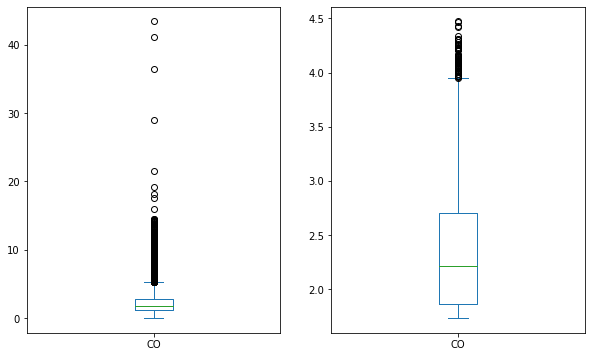

In [125]:
_ , [val, pred] = plt.subplots(1,2)
y_val.plot.box(ax = val)
pd.Series(y_pred, index = y_val.index, name = 'CO').plot.box(ax = pred)
v_vs_p

Observing the boxplots is clear that the 'extreme' values of CO emission bad affect the performance. Following the paper we separete the two groups, standard and extreme, with threshold 4,5.

In [132]:
standard_emission_df = dev_df.loc[dev_df['CO'] < 4.5, :]
extreme_emission_df = dev_df.loc[dev_df['CO'] >= 4.5, :] 

In [101]:
X_train, X_val, y_train, y_val = train_test_split( standard_emission_df.loc[:, standard_emission_df.columns != 'CO' ], standard_emission_df.loc[:, 'CO'], random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16238, 38), (5413, 38), (16238,), (5413,))

In [107]:
lasso_std = Lasso()

lasso_std.fit(X_train, y_train)
y_pred = lasso_std.predict(X_val)
print(f'Lasso baseline: MSE = {mse(y_val, y_pred)}')

Lasso baseline: MSE = 0.9640715076874484


As can be observed the MSE has been largely reduced. It may be useful deploying a classification algorithm before passing the record to the regression model.

In [111]:
lasso_std.coef_

array([-0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.])

In [118]:
lasso_std.intercept_

1.7740435513856387

Surprisingly, all coefficients are zero. This means that the model is of the type CO = $\beta_0$ = 1.7740

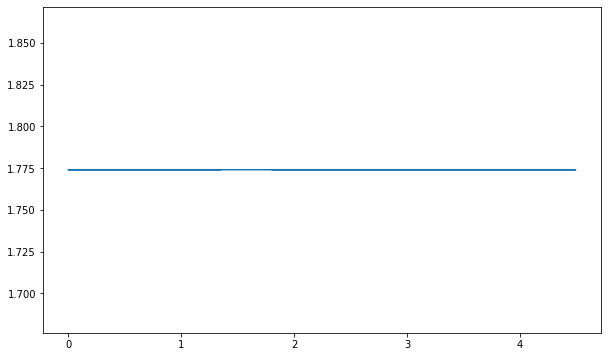

In [119]:
plt.plot(y_val, y_pred)

In [103]:
X_train_ex, X_val_ex, y_train_ex, y_val_ex = train_test_split( extreme_emission_df.loc[:, extreme_emission_df.columns != 'CO' ], extreme_emission_df.loc[:, 'CO'], test_size = None, random_state = 42)
X_train_ex.shape, X_val_ex.shape, y_train_ex.shape, y_val_ex.shape

((2127, 38), (709, 38), (2127,), (709,))

In [104]:
lasso_ex = Lasso()

lasso_ex.fit(X_train_ex, y_train_ex)
y_pred_ex = lasso_ex.predict(X_val_ex)
f'Lasso baseline: MSE = {mse(y_val_ex, y_pred_ex)}'

'Lasso baseline: MSE = 5.5046846664419595'

The MSE for extreme CO values is still high. 

In [120]:
for feature, coeff in zip(lasso_ex.feature_names_in_,lasso_ex.coef_):
    if coeff != 0.0:
        print(feature, coeff)

TAT -1.2479720895327298
NOX 0.2697916068796101


Also for the extreme cases the coefficients are almost null. The only two coefficients that are no zero are those relative to TAT and NOX.

Let now ceck the default model coefficients

In [127]:
for feature, coeff in zip(lasso.feature_names_in_,lasso.coef_):
    if coeff != 0.0:
        print(feature, coeff)

TIT -0.5844085806065221


In that case is TIT the only predictor with a non null coefficient.

Baseing on the analysis on YEAR and LOC, now we try a model without the relative columns

In [170]:
standard_emission_df_y_l = standard_emission_df.loc[: , 'AT':'CO']
X_train, X_val, y_train, y_val = train_test_split( standard_emission_df_y_l.loc[:, standard_emission_df_y_l.columns != 'CO' ], standard_emission_df_y_l.loc[:, 'CO'], random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

lasso_no_y_l = Lasso()
lasso_no_y_l.fit(X_train, y_train)
y_pred_y_l = lasso_no_y_l.predict(X_val)
mse(y_val, y_pred_y_l)

0.9640715076874484

In [134]:
for feature, coeff in zip(lasso_no_y_l.feature_names_in_,lasso_no_y_l.coef_):
    if coeff != 0.0:
        print(feature, coeff)

Even reducing the number of columns, the coefficients are always null.

## Hyperparameter Tuning

In [177]:
#Analyzing the effect of alpha
X = standard_emission_df_y_l.loc[:, standard_emission_df_y_l.columns != 'CO' ]
y = standard_emission_df_y_l.loc[:, 'CO']

def scorer(model, X, y):
    return mse(y, model.predict(X))

alpha_range = np.logspace(-3, 3, 7)
train_scores, valid_scores = validation_curve(
     Lasso(max_iter = 10000), X, y, param_name="alpha", param_range= alpha_range, scoring = scorer,
     cv=5)

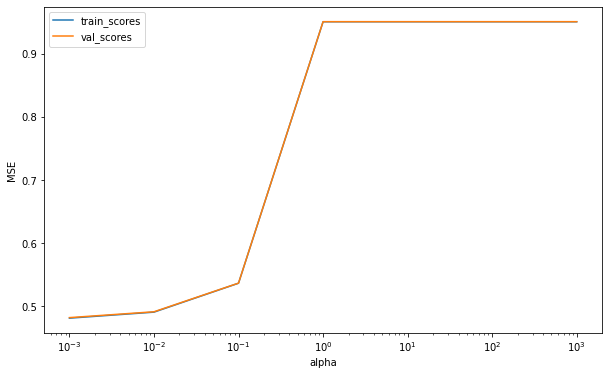

In [178]:
plt.plot(alpha_range, train_scores.mean(axis = 1), label = 'train_scores')
plt.plot(alpha_range, valid_scores.mean(axis = 1), label = 'val_scores')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

In [179]:
las = Lasso(max_iter = 10000, alpha = 10e-3)


las.fit(X_train, y_train)
y_pred_y_l = las.predict(X_val)
mse(y_val, y_pred_y_l)

0.49384795521106556

Reducing the alpha value the performance improve => A simple Linear Regression model may be better

In [180]:
las.coef_

array([-0.02882485,  0.03078352, -0.10002238, -0.0368447 ,  0.18263811,
       -0.97465108,  0.02289227, -0.        , -0.        , -0.00688127])

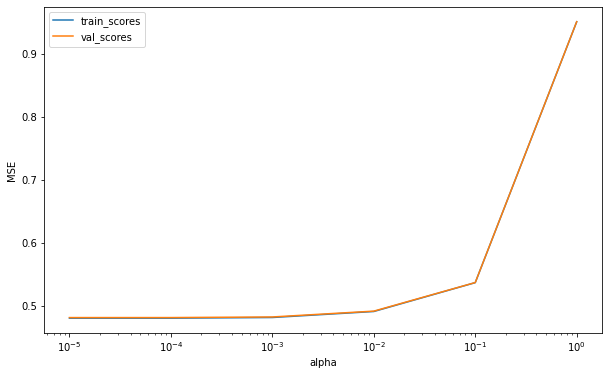

In [181]:
alpha_range = np.logspace(-5, 0, 6)
train_scores, valid_scores = validation_curve(
     Lasso(max_iter = 10000), X, y, param_name="alpha", param_range= alpha_range, scoring = scorer,
     cv=5)

plt.plot(alpha_range, train_scores.mean(axis = 1), label = 'train_scores')
plt.plot(alpha_range, valid_scores.mean(axis = 1), label = 'val_scores')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

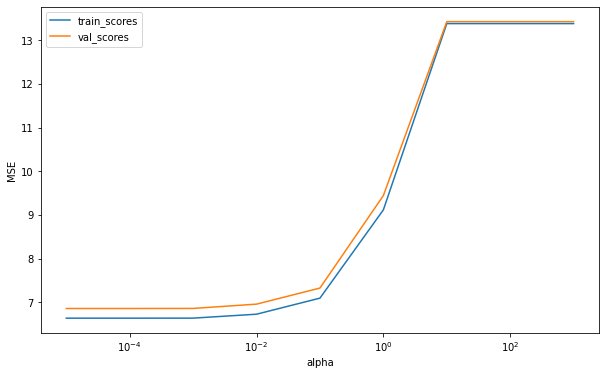

In [184]:
X = extreme_emission_df.loc[:, 'AT':'NOX' ]
y = extreme_emission_df.loc[:, 'CO']

def scorer(model, X, y):
    return mse(y, model.predict(X))

alpha_range = np.logspace(-5, 3, 9)
train_scores, valid_scores = validation_curve(
     Lasso(max_iter = 10000), X, y, param_name="alpha", param_range= alpha_range, scoring = scorer,
     cv=5)

plt.plot(alpha_range, train_scores.mean(axis = 1), label = 'train_scores')
plt.plot(alpha_range, valid_scores.mean(axis = 1), label = 'val_scores')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()

Same consideration for the extreme cases